In [7]:
# Modules
import tarfile
import networkx as nx
import matplotlib.pyplot as plt
import os
from pathlib import Path
import pprint
from science_parse_api.api import parse_pdf
import pickle

# Dataset 2

In [ ]:
# load zipped tarfile
# already run. Do not run again
tf_d2 = tarfile.open("sampled_data_for_bda.tar.gz", "r:gz")
print(tf_d2)

In [ ]:
# extract tarfile
# already run. Do not run again
tf_d2.extractall()

In [15]:
# generate a list of pdf files in D2
# already run. Do not run again
pdf_list = os.listdir(r"C:\Users\lenovo\Downloads\Big Data Analytics\Assignment 1\sampled_data_for_bda")
print(pdf_list)

['0704.0213.pdf', '0704.2902.pdf', '0705.0564.pdf', '0705.1309.pdf', '0705.1759.pdf', '0705.1922.pdf', '0705.2145.pdf', '0706.0300.pdf', '0706.1755.pdf', '0706.2725.pdf', '0706.4044.pdf', '0707.2998.pdf', '0707.3666.pdf', '0707.4166.pdf', '0707.4258.pdf', '0708.0741.pdf', '0708.1579.pdf', '0708.3811.pdf', '0709.0145.pdf', '0709.0674.pdf', '0709.1023.pdf', '0709.3094.pdf', '0710.1280.pdf', '0710.3901.pdf', '0710.4652.pdf', '0710.4670.pdf', '0710.4724.pdf', '0710.4815.pdf', '0710.4840.pdf', '0711.0692.pdf', '0711.1269.pdf', '0711.1533.pdf', '0711.1786.pdf', '0711.2546.pdf', '0711.2895.pdf', '0711.2897.pdf', '0712.0411.pdf', '0712.0554.pdf', '0712.1310.pdf', '0712.1521.pdf', '0712.1863.pdf', '0712.2592.pdf', '0712.2872.pdf', '0712.3203.pdf', '0801.0514.pdf', '0801.1416.pdf', '0801.2405.pdf', '0802.1369.pdf', '0802.2823.pdf', '0802.2834.pdf', '0802.2845.pdf', '0802.3074.pdf', '0802.3092.pdf', '0803.0450.pdf', '0803.0528.pdf', '0803.1985.pdf', '0803.2212.pdf', '0803.2615.pdf', '0803.3422.pd

# Read pdf files

In [16]:
pdf_obj_list = []

In [17]:
def read_pdf(pdf_name, host = 'http://127.0.0.1', port = '8080'):
    """ input: string (pdfname.pdf)
        output: dict
                {'title': string,
                'references': [strings]}
        run command for docker: 
docker run -p 127.0.0.1:8080:8080 --rm --init ucrel/ucrel-science-parse:3.0.1
    """
    
    path = r"C:\Users\lenovo\Downloads\Big Data Analytics\Assignment 1\sampled_data_for_bda\{fname}".format(fname = pdf_name)
    
    output_dict = parse_pdf(host, Path(path).resolve(), port = port)
    
    pp = pprint.PrettyPrinter(indent = 4)
    
    flag = True
    
    try:
        metadata = {}
        
        metadata['name'] = pdf_name

        title = output_dict['title']
        metadata['title'] = title

        references = output_dict['references']
        metadata['references'] = []

        for reference in references:
            metadata['references'].append(reference['title'])
            
    except:
        flag = False

    return (flag, metadata)

In [6]:
# example. Do not run
read_pdf('0705.1309.pdf')

(False, {'name': '0705.1309.pdf'})

In [18]:
def batch_read(index):
    """ input: int (index in pdf_list)
        output: none (appends metadata in pdf_obj_list)
    """
    for i in range(index, index+1000):
        print(pdf_list[i])
        flag, metadata = read_pdf(pdf_list[i])
        if flag:
            pdf_obj_list.append(metadata)

In [9]:
# already run. Do not run again
batch_read(0)

0704.0213.pdf
0704.2902.pdf
0705.0564.pdf
0705.1309.pdf
0705.1759.pdf
0705.1922.pdf
0705.2145.pdf
0706.0300.pdf
0706.1755.pdf
0706.2725.pdf
0706.4044.pdf
0707.2998.pdf
0707.3666.pdf
0707.4166.pdf
0707.4258.pdf
0708.0741.pdf
0708.1579.pdf
0708.3811.pdf
0709.0145.pdf
0709.0674.pdf
0709.1023.pdf
0709.3094.pdf
0710.1280.pdf
0710.3901.pdf
0710.4652.pdf
0710.4670.pdf
0710.4724.pdf
0710.4815.pdf
0710.4840.pdf
0711.0692.pdf
0711.1269.pdf
0711.1533.pdf
0711.1786.pdf
0711.2546.pdf
0711.2895.pdf
0711.2897.pdf
0712.0411.pdf
0712.0554.pdf
0712.1310.pdf
0712.1521.pdf
0712.1863.pdf
0712.2592.pdf
0712.2872.pdf
0712.3203.pdf
0801.0514.pdf
0801.1416.pdf
0801.2405.pdf
0802.1369.pdf
0802.2823.pdf
0802.2834.pdf
0802.2845.pdf
0802.3074.pdf
0802.3092.pdf
0803.0450.pdf
0803.0528.pdf
0803.1985.pdf
0803.2212.pdf
0803.2615.pdf
0803.3422.pdf
0803.4511.pdf
0804.0539.pdf
0804.2469.pdf
0804.2614.pdf
0804.2991.pdf
0804.3064.pdf
0804.3784.pdf
0805.0241.pdf
0805.1130.pdf
0805.1480.pdf
0805.1485.pdf
0805.1981.pdf
0806.1

1203.5026.pdf
1203.5051.pdf
1203.5158.pdf
1203.5188.pdf
1203.5325.pdf
1203.5350.pdf
1203.6127.pdf
1203.6157.pdf
1203.6559.pdf
1203.6864.pdf
1204.0067.pdf
1204.0266.pdf
1204.0905.pdf
1204.1201.pdf
1204.1225.pdf
1204.1245.pdf
1204.1637.pdf
1204.1688.pdf
1204.1910.pdf
1204.2336.pdf
1204.2433.pdf
1204.2942.pdf
1204.3513.pdf
1204.4253.pdf
1204.4619.pdf
1204.4840.pdf
1204.5345.pdf
1204.5525.pdf
1204.5544.pdf
1204.5631.pdf
1204.5828.pdf
1204.6385.pdf
1205.0003.pdf
1205.0337.pdf
1205.0537.pdf
1205.0790.pdf
1205.0858.pdf
1205.1786.pdf
1205.2334.pdf
1205.2467.pdf
1205.2601.pdf
1205.3020.pdf
1205.3031.pdf
1205.3441.pdf
1205.3998.pdf
1205.4634.pdf
1205.4639.pdf
1205.4839.pdf
1205.5134.pdf
1205.5819.pdf
1205.6179.pdf
1205.6229.pdf
1205.6558.pdf
1205.6928.pdf
1206.0361.pdf
1206.0549.pdf
1206.0663.pdf
1206.0985.pdf
1206.1358.pdf
1206.1494.pdf
1206.1615.pdf
1206.1943.pdf
1206.2190.pdf
1206.2497.pdf
1206.2691.pdf
1206.2774.pdf
1206.3026.pdf
1206.3138.pdf
1206.3275.pdf
1206.3483.pdf
1206.3713.pdf
1206.3

In [18]:
# already run. Do not run again
batch_read(1000)

1307.0085.pdf
1307.0426.pdf
1307.0687.pdf
1307.0927.pdf
1307.1019.pdf
1307.1380.pdf
1307.1397.pdf
1307.1447.pdf
1307.2006.pdf
1307.2118.pdf
1307.2274.pdf
1307.2411.pdf
1307.2997.pdf
1307.3033.pdf
1307.3164.pdf
1307.3877.pdf
1307.4165.pdf
1307.4318.pdf
1307.4564.pdf
1307.5161.pdf
1307.5216.pdf
1307.5653.pdf
1307.5664.pdf
1307.6462.pdf
1307.6738.pdf
1307.7068.pdf
1307.7477.pdf
1307.7786.pdf
1307.7821.pdf
1307.7867.pdf
1308.0371.pdf
1308.0455.pdf
1308.0658.pdf
1308.1509.pdf
1308.2188.pdf
1308.2307.pdf
1308.2599.pdf
1308.2666.pdf
1308.2930.pdf
1308.4125.pdf
1308.5703.pdf
1308.5786.pdf
1308.6111.pdf
1308.6181.pdf
1308.6342.pdf
1308.6641.pdf
1308.6693.pdf
1308.6694.pdf
1308.6783.pdf
1309.0185.pdf
1309.0213.pdf
1309.0576.pdf
1309.1416.pdf
1309.1588.pdf
1309.1785.pdf
1309.1807.pdf
1309.2156.pdf
1309.2904.pdf
1309.3792.pdf
1309.3944.pdf
1309.4396.pdf
1309.5147.pdf
1309.5201.pdf
1309.5822.pdf
1309.6289.pdf
1309.6825.pdf
1309.6842.pdf
1309.7472.pdf
1309.7823.pdf
1309.7982.pdf
1310.0120.pdf
1310.0

1504.02930.pdf
1504.03217.pdf
1504.03256.pdf
1504.03415.pdf
1504.03632.pdf
1504.04297.pdf
1504.04662.pdf
1504.04763.pdf
1504.05519.pdf
1504.06586.pdf
1504.06719.pdf
1504.06864.pdf
1504.07193.pdf
1504.07614.pdf
1504.07648.pdf
1504.08251.pdf
1505.00061.pdf
1505.00297.pdf
1505.00589.pdf
1505.00644.pdf
1505.00707.pdf
1505.00985.pdf
1505.01617.pdf
1505.02146.pdf
1505.02505.pdf
1505.02865.pdf
1505.02905.pdf
1505.03093.pdf
1505.03227.pdf
1505.03587.pdf
1505.03653.pdf
1505.03718.pdf
1505.04150.pdf
1505.04274.pdf
1505.04633.pdf
1505.05901.pdf
1505.05969.pdf
1505.06241.pdf
1505.06256.pdf
1505.06557.pdf
1505.06582.pdf
1505.06614.pdf
1505.07203.pdf
1506.00036.pdf
1506.00432.pdf
1506.00669.pdf
1506.00749.pdf
1506.01057.pdf
1506.01066.pdf
1506.01106.pdf
1506.01195.pdf
1506.01501.pdf
1506.01709.pdf
1506.02082.pdf
1506.02345.pdf
1506.02509.pdf
1506.02914.pdf
1506.03124.pdf
1506.03264.pdf
1506.03366.pdf
1506.03405.pdf
1506.03611.pdf
1506.03973.pdf
1506.04272.pdf
1506.04723.pdf
1506.04924.pdf
1506.05078

URL: http://127.0.0.1:8080/v1. 1512.07988.pdf failed due to a timeout.


1512.07989.pdf
1512.08041.pdf
1512.08048.pdf
1512.08279.pdf
1512.08291.pdf
1512.08757.pdf
1512.09254.pdf
1601.00087.pdf
1601.00960.pdf
1601.01348.pdf
1601.01411.pdf
1601.01566.pdf
1601.01700.pdf
1601.02376.pdf
1601.02478.pdf
1601.02939.pdf
1601.03030.pdf
1601.03239.pdf
1601.03854.pdf
1601.04012.pdf
1601.04098.pdf
1601.04131.pdf
1601.04134.pdf
1601.04388.pdf
1601.04795.pdf
1601.05164.pdf
1601.05754.pdf
1601.05834.pdf
1601.06075.pdf
1601.06421.pdf
1601.06524.pdf
1601.06676.pdf
1601.06847.pdf
1601.07101.pdf
1601.07884.pdf
1602.00067.pdf
1602.00569.pdf
1602.00668.pdf
1602.00710.pdf
1602.00733.pdf
1602.00802.pdf
1602.00831.pdf
1602.00848.pdf
1602.01059.pdf
1602.01388.pdf
1602.01520.pdf
1602.01608.pdf
1602.01950.pdf
1602.01969.pdf
1602.02282.pdf
1602.02387.pdf
1602.02675.pdf
1602.02863.pdf
1602.02867.pdf
1602.03103.pdf
1602.03109.pdf
1602.03275.pdf
1602.03400.pdf
1602.03903.pdf
1602.03945.pdf
1602.04368.pdf
1602.04399.pdf
1602.04409.pdf
1602.04419.pdf
1602.04514.pdf
1602.04851.pdf
1602.04889

In [20]:
# already run. Do not run again
batch_read(2000)

1604.05000.pdf
1604.05668.pdf
1604.06560.pdf
1604.06770.pdf
1604.06954.pdf
1604.07036.pdf
1604.07309.pdf
1604.07478.pdf
1604.07796.pdf
1604.08202.pdf
1604.08243.pdf
1604.08381.pdf
1604.08775.pdf
1604.08936.pdf
1605.00019.pdf
1605.00190.pdf
1605.00305.pdf
1605.00772.pdf
1605.01278.pdf
1605.01397.pdf
1605.01749.pdf
1605.02131.pdf
1605.02147.pdf
1605.02196.pdf
1605.02619.pdf
1605.02633.pdf
1605.02954.pdf
1605.03485.pdf
1605.03805.pdf
1605.03811.pdf
1605.04035.pdf
1605.04070.pdf
1605.04156.pdf
1605.04457.pdf
1605.04553.pdf
1605.05231.pdf
1605.05291.pdf
1605.05757.pdf
1605.05889.pdf
1605.06252.pdf
1605.06336.pdf
1605.06564.pdf
1605.06714.pdf
1605.06848.pdf
1605.06856.pdf
1605.06882.pdf
1605.07084.pdf
1605.07774.pdf
1605.07888.pdf
1605.08159.pdf
1605.08409.pdf
1605.08754.pdf
1605.08771.pdf
1605.09546.pdf
1605.09584.pdf
1605.09624.pdf
1605.09721.pdf
1606.00037.pdf
1606.00195.pdf
1606.00341.pdf
1606.00410.pdf
1606.01274.pdf
1606.01434.pdf
1606.01454.pdf
1606.01540.pdf
1606.01543.pdf
1606.01607

1704.05391.pdf
1704.06001.pdf
1704.06192.pdf
1704.06380.pdf
1704.06493.pdf
1704.07097.pdf
1704.07158.pdf
1704.07352.pdf
1704.07506.pdf
1704.07856.pdf
1704.07998.pdf
1704.08218.pdf
1704.08469.pdf
1704.08670.pdf
1704.08713.pdf
1704.08812.pdf
1704.08836.pdf
1705.00056.pdf
1705.00607.pdf
1705.00769.pdf
1705.00919.pdf
1705.01013.pdf
1705.01187.pdf
1705.01207.pdf
1705.01507.pdf
1705.01522.pdf
1705.01539.pdf
1705.02193.pdf
1705.02505.pdf
1705.03288.pdf
1705.03414.pdf
1705.03637.pdf
1705.03754.pdf
1705.03986.pdf
1705.04281.pdf
1705.04804.pdf
1705.04915.pdf
1705.04945.pdf
1705.04969.pdf
1705.04971.pdf
1705.05366.pdf
1705.05396.pdf
1705.05415.pdf
1705.05502.pdf
1705.05998.pdf
1705.06350.pdf
1705.06676.pdf
1705.07070.pdf
1705.07393.pdf
1705.07551.pdf
1705.07747.pdf
1705.08092.pdf
1705.08252.pdf
1705.08374.pdf
1705.08621.pdf
1705.08947.pdf
1705.08971.pdf
1705.09101.pdf
1705.09303.pdf
1705.09823.pdf
1705.09847.pdf
1705.10415.pdf
1705.10570.pdf
1705.10586.pdf
1705.11175.pdf
1706.00274.pdf
1706.00307

URL: http://127.0.0.1:8080/v1. 1708.00975.pdf failed due to a timeout.


1708.00989.pdf
1708.01130.pdf
1708.02037.pdf
1708.02146.pdf
1708.02179.pdf
1708.02537.pdf
1708.02702.pdf
1708.02862.pdf
1708.02941.pdf
1708.03257.pdf
1708.03583.pdf
1708.03619.pdf
1708.03735.pdf
1708.03759.pdf
1708.03950.pdf
1708.03962.pdf
1708.04060.pdf
1708.04109.pdf
1708.04655.pdf
1708.04872.pdf
1708.04956.pdf
1708.05155.pdf
1708.05425.pdf
1708.05869.pdf
1708.06183.pdf
1708.06243.pdf
1708.06248.pdf
1708.06252.pdf
1708.06466.pdf
1708.06656.pdf
1708.06832.pdf
1708.06997.pdf
1708.07217.pdf
1708.07424.pdf
1708.07918.pdf
1708.08669.pdf
1708.08748.pdf
1708.08895.pdf
1708.09034.pdf
1708.09641.pdf
1708.09644.pdf
1708.09794.pdf
1708.09815.pdf
1709.00023.pdf
1709.00147.pdf
1709.00198.pdf
1709.00714.pdf
1709.01493.pdf
1709.01568.pdf
1709.01569.pdf
1709.03133.pdf
1709.03245.pdf
1709.03329.pdf
1709.03374.pdf
1709.03450.pdf
1709.03456.pdf
1709.03551.pdf
1709.03588.pdf
1709.03831.pdf
1709.05139.pdf
1709.05200.pdf
1709.05203.pdf
1709.05715.pdf
1709.05725.pdf
1709.05744.pdf
1709.05768.pdf
1709.05843

In [24]:
# already run. Do not run again
batch_read(3000)

1801.03644.pdf
1801.03861.pdf
1801.03967.pdf
1801.03983.pdf
1801.04015.pdf
1801.04326.pdf
1801.04472.pdf
1801.04545.pdf
1801.04600.pdf
1801.04816.pdf
1801.04828.pdf
1801.04953.pdf
1801.05075.pdf
1801.05284.pdf
1801.05607.pdf
1801.05649.pdf
1801.05764.pdf
1801.05853.pdf
1801.05926.pdf
1801.06052.pdf
1801.06172.pdf
1801.06290.pdf
1801.06449.pdf
1801.06864.pdf
1801.07011.pdf
1801.07544.pdf
1801.07624.pdf
1801.07654.pdf
1801.07853.pdf
1801.08252.pdf
1801.08266.pdf
1801.08271.pdf
1801.08406.pdf
1801.08459.pdf
1801.09100.pdf
1801.09189.pdf
1801.09373.pdf
1801.09651.pdf
1801.09786.pdf
1801.10288.pdf
1801.10437.pdf
1801.10562.pdf
1802.00308.pdf
1802.00535.pdf
1802.00538.pdf
1802.00561.pdf
1802.00565.pdf
1802.00588.pdf
1802.00844.pdf
1802.00970.pdf
1802.00974.pdf
1802.01061.pdf
1802.01189.pdf
1802.01284.pdf
1802.01706.pdf
1802.01766.pdf
1802.01987.pdf
1802.02598.pdf
1802.02796.pdf
1802.03006.pdf
1802.03201.pdf
1802.03272.pdf
1802.03316.pdf
1802.03365.pdf
1802.03527.pdf
1802.03769.pdf
1802.03773

1809.00365.pdf
1809.00421.pdf
1809.00491.pdf
1809.00641.pdf
1809.00646.pdf
1809.01334.pdf
1809.01398.pdf
1809.01499.pdf
1809.01554.pdf
1809.01577.pdf
1809.01807.pdf
1809.01962.pdf
1809.02042.pdf
1809.02269.pdf
1809.02394.pdf
1809.02399.pdf
1809.02499.pdf
1809.02637.pdf
1809.02652.pdf
1809.03044.pdf
1809.03309.pdf
1809.03371.pdf
1809.03546.pdf
1809.03566.pdf
1809.03776.pdf
1809.04120.pdf
1809.04185.pdf
1809.04318.pdf
1809.04344.pdf
1809.04659.pdf
1809.04684.pdf
1809.04696.pdf
1809.04783.pdf
1809.04920.pdf
1809.05521.pdf
1809.05590.pdf
1809.05700.pdf
1809.05723.pdf
1809.05725.pdf
1809.05767.pdf
1809.05817.pdf
1809.05921.pdf
1809.06113.pdf
1809.06591.pdf
1809.06646.pdf
1809.06647.pdf
1809.06800.pdf
1809.07180.pdf
1809.07405.pdf
1809.07607.pdf
1809.07912.pdf
1809.08022.pdf
1809.08055.pdf
1809.08076.pdf
1809.08400.pdf
1809.08438.pdf
1809.08613.pdf
1809.08662.pdf
1809.08822.pdf
1809.09170.pdf
1809.09206.pdf
1809.09311.pdf
1809.09566.pdf
1809.10012.pdf
1809.10105.pdf
1809.10188.pdf
1809.10280

In [39]:
# already run. Do not run again
batch_read(4000)

1902.04238.pdf
1902.04272.pdf
1902.04570.pdf
1902.04646.pdf
1902.04882.pdf
1902.04972.pdf
1902.04995.pdf
1902.05093.pdf
1902.05218.pdf
1902.05390.pdf
1902.05465.pdf
1902.05509.pdf
1902.05590.pdf
1902.05718.pdf
1902.06243.pdf
1902.06306.pdf
1902.06553.pdf
1902.06670.pdf
1902.06713.pdf
1902.06714.pdf
1902.07181.pdf
1902.07197.pdf
1902.07239.pdf
1902.07292.pdf
1902.07379.pdf
1902.07438.pdf
1902.07785.pdf
1902.07971.pdf
1902.08077.pdf
1902.08091.pdf
1902.08438.pdf
1902.08739.pdf
1902.09094.pdf
1902.09213.pdf
1902.09328.pdf
1902.09520.pdf
1902.09523.pdf
1902.09699.pdf
1902.09718.pdf
1902.09725.pdf
1902.09834.pdf
1902.10058.pdf
1902.10291.pdf
1902.10528.pdf
1902.10858.pdf
1902.10859.pdf
1902.10949.pdf
1902.11097.pdf
1903.00138.pdf
1903.00278.pdf
1903.00720.pdf
1903.01067.pdf
1903.01231.pdf
1903.01635.pdf
1903.01839.pdf
1903.01843.pdf
1903.01907.pdf
1903.01982.pdf
1903.02062.pdf
1903.02083.pdf
1903.02149.pdf
1903.02429.pdf
1903.02606.pdf
1903.02984.pdf
1903.03033.pdf
1903.03088.pdf
1903.03268

1908.05455.pdf
1908.05818.pdf
1908.05823.pdf
1908.06183.pdf
1908.06283.pdf
1908.06309.pdf
1908.06649.pdf
1908.06693.pdf
1908.07315.pdf
1908.07388.pdf
1908.07452.pdf
1908.07592.pdf
1908.07667.pdf
1908.08017.pdf
1908.08039.pdf
1908.08244.pdf
1908.08279.pdf
1908.08289.pdf
1908.08351.pdf
1908.08465.pdf
1908.08612.pdf
1908.08796.pdf
1908.08990.pdf
1908.09070.pdf
1908.09122.pdf
1908.09185.pdf
1908.09220.pdf
1908.09222.pdf
1908.09348.pdf
1908.09368.pdf
1908.09487.pdf
1908.09625.pdf
1908.09745.pdf
1908.09774.pdf
1908.10010.pdf
1908.10027.pdf
1908.10053.pdf
1908.10187.pdf
1908.10405.pdf
1908.10737.pdf
1908.10899.pdf
1908.11133.pdf
1908.11140.pdf
1908.11399.pdf
1908.11431.pdf
1908.11733.pdf
1909.00049.pdf
1909.00318.pdf
1909.00470.pdf
1909.00769.pdf
1909.01044.pdf
1909.01060.pdf
1909.01066.pdf
1909.01078.pdf
1909.01093.pdf
1909.01469.pdf
1909.01477.pdf
1909.01561.pdf
1909.01575.pdf
1909.01614.pdf
1909.01813.pdf
1909.01939.pdf
1909.02180.pdf
1909.02392.pdf
1909.02468.pdf
1909.02506.pdf
1909.02597

In [48]:
# already run. Do not run again
batch_read(5000)

1912.07340.pdf
1912.07475.pdf
1912.07618.pdf
1912.08240.pdf
1912.08434.pdf
1912.08436.pdf
1912.08485.pdf
1912.08638.pdf
1912.08768.pdf
1912.08776.pdf
1912.08868.pdf
1912.09230.pdf
1912.09500.pdf
1912.09508.pdf
1912.10021.pdf
1912.10190.pdf
1912.10312.pdf
1912.10635.pdf
1912.10738.pdf
1912.11566.pdf
1912.11596.pdf
1912.11684.pdf
1912.11891.pdf
1912.11986.pdf
1912.12756.pdf
1912.12802.pdf
1912.12820.pdf
1912.12914.pdf
1912.13201.pdf
2001.00004.pdf
2001.00030.pdf
2001.00135.pdf
2001.00170.pdf
2001.00178.pdf
2001.00185.pdf
2001.00330.pdf
2001.00411.pdf
2001.00457.pdf
2001.00607.pdf
2001.00630.pdf
2001.00649.pdf
2001.00658.pdf
2001.00781.pdf
2001.01008.pdf
2001.01088.pdf
2001.01127.pdf
2001.01211.pdf
2001.01223.pdf
2001.01331.pdf
2001.01536.pdf
2001.01829.pdf
2001.01838.pdf
2001.01948.pdf
2001.02172.pdf
2001.02301.pdf
2001.02328.pdf
2001.02435.pdf
2001.02491.pdf
2001.02593.pdf
2001.02906.pdf
2001.03403.pdf
2001.03983.pdf
2001.04063.pdf
2001.04168.pdf
2001.04261.pdf
2001.04264.pdf
2001.04349

2005.07151.pdf
2005.07355.pdf
2005.07404.pdf
2005.07518.pdf
2005.07548.pdf
2005.07604.pdf
2005.07727.pdf
2005.07788.pdf
2005.07862.pdf
2005.08065.pdf
2005.08235.pdf
2005.08259.pdf
2005.08304.pdf
2005.08341.pdf
2005.08497.pdf
2005.08584.pdf
2005.08650.pdf
2005.09030.pdf
2005.09067.pdf
2005.09093.pdf
2005.09282.pdf
2005.09288.pdf
2005.09681.pdf
2005.09781.pdf
2005.09850.pdf
2005.09944.pdf
2005.10052.pdf
2005.10322.pdf
2005.10346.pdf
2005.10629.pdf
2005.10783.pdf
2005.10955.pdf
2005.11035.pdf
2005.11203.pdf
2005.11270.pdf
2005.11364.pdf
2005.11474.pdf
2005.11541.pdf
2005.11651.pdf
2005.11716.pdf
2005.11875.pdf
2005.12072.pdf
2005.12229.pdf
2005.12476.pdf
2005.12683.pdf
2005.12988.pdf
2005.13139.pdf
2005.13283.pdf
2005.13512.pdf
2005.13630.pdf
2005.13635.pdf
2005.13754.pdf
2005.13857.pdf
2006.00249.pdf
2006.00683.pdf
2006.00749.pdf
2006.00752.pdf
2006.00850.pdf
2006.00896.pdf
2006.01117.pdf
2006.01285.pdf
2006.01448.pdf
2006.01463.pdf
2006.01603.pdf
2006.01615.pdf
2006.01849.pdf
2006.02241

In [51]:
# already run. Do not run again
batch_read(6000)

2009.00743.pdf
2009.00776.pdf
2009.00905.pdf
2009.00951.pdf
2009.01282.pdf
2009.01341.pdf
2009.01488.pdf
2009.01502.pdf
2009.01702.pdf
2009.01747.pdf
2009.01785.pdf
2009.02033.pdf
2009.02189.pdf
2009.02351.pdf
2009.02400.pdf
2009.02470.pdf
2009.02526.pdf
2009.02618.pdf
2009.02778.pdf
2009.02845.pdf
2009.02846.pdf
2009.02909.pdf
2009.03118.pdf
2009.03140.pdf
2009.03452.pdf
2009.03482.pdf
2009.03522.pdf
2009.03675.pdf
2009.03678.pdf
2009.03679.pdf
2009.03695.pdf
2009.03871.pdf
2009.04002.pdf
2009.04110.pdf
2009.04400.pdf
2009.04525.pdf
2009.04693.pdf
2009.04901.pdf
2009.04984.pdf
2009.05226.pdf
2009.05303.pdf
2009.05346.pdf
2009.05356.pdf
2009.05363.pdf
2009.05868.pdf
2009.06000.pdf
2009.06011.pdf
2009.06082.pdf
2009.06161.pdf
2009.06215.pdf
2009.06292.pdf
2009.06332.pdf
2009.06726.pdf
2009.06784.pdf
2009.06993.pdf
2009.06996.pdf
2009.07378.pdf
2009.07526.pdf
2009.08027.pdf
2009.08128.pdf
2009.08278.pdf
2009.08373.pdf
2009.08720.pdf
2009.08724.pdf
2009.08924.pdf
2009.08925.pdf
2009.08962

2012.13121.pdf
2012.13321.pdf
2012.13552.pdf
2012.13563.pdf
2012.13580.pdf
2012.13608.pdf
2012.13615.pdf
2012.13633.pdf
2012.13693.pdf
2012.13980.pdf
2012.14249.pdf
2012.14251.pdf
2012.14274.pdf
2012.14363.pdf
2012.14372.pdf
2012.14678.pdf
2012.14681.pdf
2012.14816.pdf
2012.14956.pdf
2012.15020.pdf
2012.15483.pdf
2012.15643.pdf
2012.15739.pdf
2012.15784.pdf
2101.00346.pdf
2101.00489.pdf
2101.00576.pdf
2101.00579.pdf
2101.00582.pdf
2101.00629.pdf
2101.00740.pdf
2101.00884.pdf
2101.00897.pdf
2101.01279.pdf
2101.01334.pdf
2101.01703.pdf
2101.01751.pdf
2101.01844.pdf
2101.02144.pdf
2101.02278.pdf
2101.02452.pdf
2101.02483.pdf
2101.02515.pdf
2101.02776.pdf
2101.02841.pdf
2101.02844.pdf
2101.02930.pdf
2101.03266.pdf
2101.03275.pdf
2101.03337.pdf
2101.03419.pdf
2101.03441.pdf
2101.03464.pdf
2101.03844.pdf
2101.03887.pdf
2101.03888.pdf
2101.03904.pdf
2101.04047.pdf
2101.04086.pdf
2101.04403.pdf
2101.04493.pdf
2101.04800.pdf
2101.04866.pdf
2101.04922.pdf
2101.04976.pdf
2101.05022.pdf
2101.05216

In [61]:
# already run. Do not run again
batch_read(7000)

2104.02963.pdf
2104.02968.pdf
2104.03004.pdf
2104.03015.pdf
2104.03032.pdf
2104.03043.pdf
2104.03106.pdf
2104.03114.pdf
2104.03203.pdf
2104.03498.pdf
2104.03544.pdf
2104.03562.pdf
2104.03668.pdf
2104.03737.pdf
2104.03801.pdf
2104.03848.pdf
2104.03882.pdf
2104.03952.pdf
2104.04005.pdf
2104.04171.pdf
2104.04174.pdf
2104.04324.pdf
2104.04718.pdf
2104.04828.pdf
2104.05010.pdf
2104.05107.pdf
2104.05307.pdf
2104.05319.pdf
2104.05390.pdf
2104.05606.pdf
2104.05628.pdf
2104.05765.pdf
2104.05888.pdf
2104.05983.pdf
2104.06094.pdf
2104.06222.pdf
2104.06387.pdf
2104.06461.pdf
2104.06916.pdf
2104.06984.pdf
2104.07195.pdf
2104.07295.pdf
2104.07469.pdf
2104.07553.pdf
2104.07555.pdf
2104.07560.pdf
2104.07567.pdf
2104.07586.pdf
2104.07715.pdf
2104.08506.pdf
2104.08530.pdf
2104.08726.pdf
2104.08757.pdf
2104.08829.pdf
2104.08987.pdf
2104.09062.pdf
2104.09074.pdf
2104.09185.pdf
2104.09190.pdf
2104.09371.pdf
2104.09499.pdf
2104.09556.pdf
2104.09569.pdf
2104.09615.pdf
2104.09949.pdf
2104.10067.pdf
2104.10134

2107.10912.pdf
2107.10957.pdf
2107.11030.pdf
2107.11433.pdf
2107.11460.pdf
2107.11470.pdf
2107.11477.pdf
2107.11665.pdf
2107.11701.pdf
2107.11723.pdf
2107.11729.pdf
2107.11825.pdf
2107.11889.pdf
2107.12068.pdf
2107.12269.pdf
2107.12308.pdf
2107.12330.pdf
2107.12346.pdf
2107.12373.pdf
2107.12501.pdf
2107.12578.pdf
2107.12646.pdf
2107.12841.pdf
2107.12845.pdf
2107.12917.pdf
2107.13059.pdf
2107.13078.pdf
2107.13403.pdf
2107.13535.pdf
2107.14159.pdf
2107.14261.pdf
2107.14264.pdf
2107.14442.pdf
2107.14590.pdf
2108.00061.pdf
2108.00101.pdf
2108.00314.pdf
2108.00340.pdf
2108.00372.pdf
2108.00468.pdf
2108.00516.pdf
2108.00679.pdf
2108.00978.pdf
2108.01210.pdf
2108.01215.pdf
2108.01219.pdf
2108.01407.pdf
2108.01430.pdf
2108.01628.pdf
2108.01662.pdf
2108.01843.pdf
2108.01869.pdf
2108.01875.pdf
2108.02025.pdf
2108.02039.pdf
2108.02156.pdf
2108.02162.pdf
2108.02388.pdf
2108.02512.pdf
2108.02579.pdf
2108.02756.pdf
2108.02833.pdf
2108.03022.pdf
2108.03047.pdf
2108.03141.pdf
2108.03284.pdf
2108.03372

In [80]:
# already run. Do not run again
batch_read(8000)

2110.14945.pdf
2110.15108.pdf
2110.15163.pdf
2110.15608.pdf
2110.15719.pdf
2110.15784.pdf
2110.15809.pdf
2111.00034.pdf
2111.00177.pdf
2111.00193.pdf
2111.00231.pdf
2111.00242.pdf
2111.00316.pdf
2111.00607.pdf
2111.00640.pdf
2111.00695.pdf
2111.00899.pdf
2111.00924.pdf
2111.01036.pdf
2111.01300.pdf
2111.01440.pdf
2111.01456.pdf
2111.01537.pdf
2111.01589.pdf
2111.01953.pdf
2111.01956.pdf
2111.02120.pdf
2111.02244.pdf
2111.02257.pdf
2111.02306.pdf
2111.02358.pdf
2111.02626.pdf
2111.02642.pdf
2111.02703.pdf
2111.02725.pdf
2111.02732.pdf
2111.02773.pdf
2111.02915.pdf
2111.02964.pdf
2111.03059.pdf
2111.03210.pdf
2111.03549.pdf
2111.03656.pdf
2111.03930.pdf
2111.04092.pdf
2111.04456.pdf
2111.04460.pdf
2111.04469.pdf
2111.04670.pdf
2111.04945.pdf
2111.05108.pdf
2111.06017.pdf
2111.06031.pdf
2111.06098.pdf
2111.06290.pdf
2111.06377.pdf
2111.06628.pdf
2111.06759.pdf
2111.07001.pdf
2111.07059.pdf
2111.07113.pdf
2111.07187.pdf
2111.07602.pdf
2111.07611.pdf
2111.07764.pdf
2111.07769.pdf
2111.07819

2203.03187.pdf
2203.03300.pdf
2203.03327.pdf
2203.03441.pdf
2203.03451.pdf
2203.03519.pdf
2203.03541.pdf
2203.03601.pdf
2203.03621.pdf
2203.03991.pdf
2203.04038.pdf
2203.04113.pdf
2203.04132.pdf
2203.04476.pdf
2203.04500.pdf
2203.04700.pdf
2203.04708.pdf
2203.05006.pdf
2203.05153.pdf
2203.05166.pdf
2203.05208.pdf
2203.05250.pdf
2203.05272.pdf
2203.05610.pdf
2203.05775.pdf
2203.05778.pdf
2203.05949.pdf
2203.06074.pdf
2203.06176.pdf
2203.06580.pdf
2203.06654.pdf
2203.06837.pdf
2203.06855.pdf
2203.06974.pdf
2203.06977.pdf
2203.07116.pdf
2203.07143.pdf
2203.07171.pdf
2203.07191.pdf
2203.07402.pdf
2203.07404.pdf
2203.07407.pdf
2203.07547.pdf
2203.07561.pdf
2203.07616.pdf
2203.07673.pdf
2203.07691.pdf
2203.07774.pdf
2203.07918.pdf
2203.08303.pdf
2203.08383.pdf
2203.08513.pdf
2203.08906.pdf
2203.08914.pdf
2203.08933.pdf
2203.08937.pdf
2203.09087.pdf
2203.09101.pdf
2203.09109.pdf
2203.09136.pdf
2203.09160.pdf
2203.09181.pdf
2203.09337.pdf
2203.09481.pdf
2203.09597.pdf
2203.09714.pdf
2203.09773

In [73]:
# already run. Do not run again
batch_read(9000)

2206.03446.pdf
2206.03451.pdf
2206.03560.pdf
2206.03635.pdf
2206.03761.pdf
2206.04249.pdf
2206.04271.pdf
2206.04428.pdf
2206.04434.pdf
2206.04511.pdf
2206.04561.pdf
2206.04572.pdf
2206.04727.pdf
2206.04865.pdf
2206.04879.pdf
2206.04951.pdf
2206.04988.pdf
2206.05032.pdf
2206.05263.pdf
2206.05361.pdf
2206.05368.pdf
2206.05478.pdf
2206.05707.pdf
2206.06124.pdf
2206.06223.pdf
2206.06258.pdf
2206.06444.pdf
2206.06485.pdf
2206.06652.pdf
2206.06795.pdf
2206.06978.pdf
2206.07011.pdf
2206.07019.pdf
2206.07021.pdf
2206.07050.pdf
2206.07052.pdf
2206.07207.pdf
2206.07236.pdf
2206.07365.pdf
2206.07765.pdf
2206.07795.pdf
2206.07801.pdf
2206.07826.pdf
2206.08022.pdf
2206.08029.pdf
2206.08324.pdf
2206.08361.pdf
2206.08425.pdf
2206.08626.pdf
2206.08790.pdf
2206.08881.pdf
2206.08919.pdf
2206.08934.pdf
2206.09012.pdf
2206.09107.pdf
2206.09166.pdf
2206.09514.pdf
2206.09526.pdf
2206.09674.pdf
2206.09714.pdf
2206.09917.pdf
2206.10107.pdf
2206.10123.pdf
2206.10613.pdf
2206.10902.pdf
2206.11056.pdf
2206.11064

2210.06551.pdf
2210.06755.pdf
2210.06757.pdf
2210.06974.pdf
2210.07089.pdf
2210.07198.pdf
2210.07296.pdf
2210.07586.pdf
2210.07990.pdf
2210.08069.pdf
2210.08129.pdf
2210.08168.pdf
2210.08233.pdf
2210.08273.pdf
2210.08300.pdf
2210.08388.pdf
2210.08410.pdf
2210.08486.pdf
2210.08530.pdf
2210.08701.pdf
2210.08832.pdf
2210.08909.pdf
2210.08934.pdf
2210.08936.pdf
2210.08976.pdf
2210.08981.pdf
2210.09082.pdf
2210.09198.pdf
2210.09202.pdf
2210.09449.pdf
2210.09475.pdf
2210.09778.pdf
2210.10314.pdf
2210.10341.pdf
2210.10358.pdf
2210.10401.pdf
2210.10462.pdf
2210.10626.pdf
2210.10687.pdf
2210.10693.pdf
2210.10723.pdf
2210.10773.pdf
2210.10999.pdf
2210.11044.pdf
2210.11161.pdf
2210.11269.pdf
2210.11419.pdf
2210.11460.pdf
2210.11695.pdf
2210.11880.pdf
2210.11978.pdf
2210.12229.pdf
2210.12236.pdf
2210.12523.pdf
2210.12648.pdf
2210.12690.pdf
2210.12739.pdf
2210.12892.pdf
2210.12949.pdf
2210.13011.pdf
2210.13144.pdf
2210.13184.pdf
2210.13209.pdf
2210.13232.pdf
2210.13356.pdf
2210.13387.pdf
2210.13836

# Class and its methods for data dumps

In [19]:
class MyClass():
    def __init__(self, param):
        self.param = param

In [20]:
def save_object(obj):
    try:
        with open("Part3_D2.pickle", "wb") as f:
            pickle.dump(obj, f, protocol=pickle.HIGHEST_PROTOCOL)
    except Exception as ex:
        print("Error during pickling object (Possibly unsupported):", ex)

In [21]:
def save_citation_dict(obj):
    try:
        with open("Part3_citation_dict.pickle", "wb") as f:
            pickle.dump(obj, f, protocol=pickle.HIGHEST_PROTOCOL)
    except Exception as ex:
        print("Error during pickling object (Possibly unsupported):", ex)

In [22]:
def load_object(filename):
    try:
        with open(filename, "rb") as f:
            return pickle.load(f)
    except Exception as ex:
        print("Error during unpickling object (Possibly unsupported):", ex)

In [82]:
# already run. Do not run again
obj = MyClass(pdf_obj_list)
save_object(obj)

In [83]:
# already run. Do not run again
pdf_obj_list = obj.param

In [23]:
D2 = load_object("Part3_D2.pickle").param

In [24]:
pp = pprint.PrettyPrinter(indent = 4)
pp.pprint(D2[0])

{   'name': '0704.0213.pdf',
    'references': [   'Tensor product multiplicities and convex polytopes in '
                      'partition space',
                      'On the computation of Clebsch-Gordan coefficients and '
                      'the dilation effect',
                      'Polynomial algorithms for computing the Smith and '
                      'Hermite normal forms of an integer matrix',
                      'A new polynomial-time algorithm for linear programming',
                      'A polynomial algorithm for linear programming',
                      'Stretched Littlewood-Richardson coefficients and Kostka '
                      'coefficients',
                      'The Honeycomb model of GLn(C) tensor products I: proof '
                      'of the saturation conjecture',
                      'Honeycombs and sums of Hermitian matrices',
                      'Geometric complexity theory III, on deciding positivity '
                      'of Littlew

# Algorithm for citation dictionary

In [25]:
names = pdf_list
titles = ["" for i in names]
references = [[] for i in names]

In [26]:
for files in D2:
    if files['name'] in names:
        titles[names.index(files['name'])] = files['title']

In [27]:
for files in D2:
    ref_list = []
    for ref in files['references']:
        if ref in titles:
            ref_list.append(names[titles.index(ref)])
    references[names.index(files['name'])] = ref_list

In [28]:
# create citation dictionary
citation_dict = {}
for index in range(len(names)):
    citation_dict[names[index]] = references[index]

In [29]:
# visualise citation dictionary
pp = pprint.PrettyPrinter(indent = 4)
pp.pprint(citation_dict)

{   '0704.0213.pdf': [],
    '0704.2902.pdf': [],
    '0705.0564.pdf': [],
    '0705.1309.pdf': [],
    '0705.1759.pdf': [],
    '0705.1922.pdf': [],
    '0705.2145.pdf': [],
    '0706.0300.pdf': [],
    '0706.1755.pdf': [],
    '0706.2725.pdf': [],
    '0706.4044.pdf': [],
    '0707.2998.pdf': [],
    '0707.3666.pdf': [],
    '0707.4166.pdf': [],
    '0707.4258.pdf': [],
    '0708.0741.pdf': [],
    '0708.1579.pdf': [],
    '0708.3811.pdf': [],
    '0709.0145.pdf': [],
    '0709.0674.pdf': [],
    '0709.1023.pdf': [],
    '0709.3094.pdf': [],
    '0710.1280.pdf': [],
    '0710.3901.pdf': [],
    '0710.4652.pdf': [],
    '0710.4670.pdf': [],
    '0710.4724.pdf': [],
    '0710.4815.pdf': [],
    '0710.4840.pdf': [],
    '0711.0692.pdf': [],
    '0711.1269.pdf': [],
    '0711.1533.pdf': [],
    '0711.1786.pdf': [],
    '0711.2546.pdf': [],
    '0711.2895.pdf': [],
    '0711.2897.pdf': [],
    '0712.0411.pdf': [],
    '0712.0554.pdf': [],
    '0712.1310.pdf': [],
    '0712.1521.pdf': [],


In [30]:
# already run. Do not run again
citation_dict = MyClass(citation_dict)
save_citation_dict(citation_dict)

# Networkx graph

In [31]:
citation_dict = load_object("Part3_citation_dict.pickle").param

In [32]:
# intialize networkx graph object
citation_graph = nx.Graph()

In [33]:
# create nodes in graph
citation_graph.add_nodes_from(names)

In [34]:
# print the number of nodes generated
citation_graph.number_of_nodes()

10000

In [35]:
# create edges in graph
for key in citation_dict:
    for val in citation_dict[key]:
        print(key, val)
        citation_graph.add_edge(key, val)

1104.1998.pdf 1104.1998.pdf
1109.6841.pdf 1109.6841.pdf
1110.0892.pdf 1803.06850.pdf
1112.0311.pdf 1803.06850.pdf
1205.4634.pdf 1803.06850.pdf
1207.4074.pdf 1207.4074.pdf
1207.4567.pdf 1803.06850.pdf
1208.6028.pdf 1803.06850.pdf
1306.2158.pdf 1003.4394.pdf
1403.6661.pdf 1403.6661.pdf
1411.3815.pdf 1803.06850.pdf
1411.3815.pdf 1803.06850.pdf
1504.06586.pdf 1504.06586.pdf
1508.01056.pdf 1803.06850.pdf
1511.06996.pdf 1208.2943.pdf
1601.02939.pdf 1803.06850.pdf
1601.02939.pdf 1803.06850.pdf
1602.00802.pdf 1304.1785.pdf
1602.04419.pdf 1508.06782.pdf
1607.00648.pdf 1510.04995.pdf
1608.03367.pdf 1803.06850.pdf
1608.03367.pdf 1803.06850.pdf
1609.00118.pdf 1609.00118.pdf
1610.01339.pdf 1603.01080.pdf
1610.05377.pdf 1109.6881.pdf
1611.04150.pdf 1611.04150.pdf
1611.05009.pdf 1409.6070.pdf
1703.01038.pdf 1609.01826.pdf
1704.08670.pdf 1503.01034.pdf
1705.09847.pdf 1612.00796.pdf
1705.09847.pdf 1908.08017.pdf
1708.06997.pdf 1803.06850.pdf
1711.00457.pdf 1803.06850.pdf
1711.02718.pdf 1803.06850.pdf
1

In [36]:
# print the number of edges generated
citation_graph.number_of_edges()

247

In [39]:
# degree of a vertex
degrees = []
for node in citation_graph.nodes():
    degrees.append(citation_graph.degree(node))

In [40]:
print("Average degree: ", sum(degrees)/len(degrees))

Average degree:  0.0494


In [41]:
# clustering coefficient for nodes
pp.pprint(nx.clustering(citation_graph))

{   '0704.0213.pdf': 0,
    '0704.2902.pdf': 0,
    '0705.0564.pdf': 0,
    '0705.1309.pdf': 0,
    '0705.1759.pdf': 0,
    '0705.1922.pdf': 0,
    '0705.2145.pdf': 0,
    '0706.0300.pdf': 0,
    '0706.1755.pdf': 0,
    '0706.2725.pdf': 0,
    '0706.4044.pdf': 0,
    '0707.2998.pdf': 0,
    '0707.3666.pdf': 0,
    '0707.4166.pdf': 0,
    '0707.4258.pdf': 0,
    '0708.0741.pdf': 0,
    '0708.1579.pdf': 0,
    '0708.3811.pdf': 0,
    '0709.0145.pdf': 0,
    '0709.0674.pdf': 0,
    '0709.1023.pdf': 0,
    '0709.3094.pdf': 0,
    '0710.1280.pdf': 0,
    '0710.3901.pdf': 0,
    '0710.4652.pdf': 0,
    '0710.4670.pdf': 0,
    '0710.4724.pdf': 0,
    '0710.4815.pdf': 0,
    '0710.4840.pdf': 0,
    '0711.0692.pdf': 0,
    '0711.1269.pdf': 0,
    '0711.1533.pdf': 0,
    '0711.1786.pdf': 0,
    '0711.2546.pdf': 0,
    '0711.2895.pdf': 0,
    '0711.2897.pdf': 0,
    '0712.0411.pdf': 0,
    '0712.0554.pdf': 0,
    '0712.1310.pdf': 0,
    '0712.1521.pdf': 0,
    '0712.1863.pdf': 0,
    '0712.2592.p

In [43]:
# average clustering coefficient for nodes
print("Average clustering coefficient: ", nx.average_clustering(citation_graph))

Average clustering coefficient:  0.0


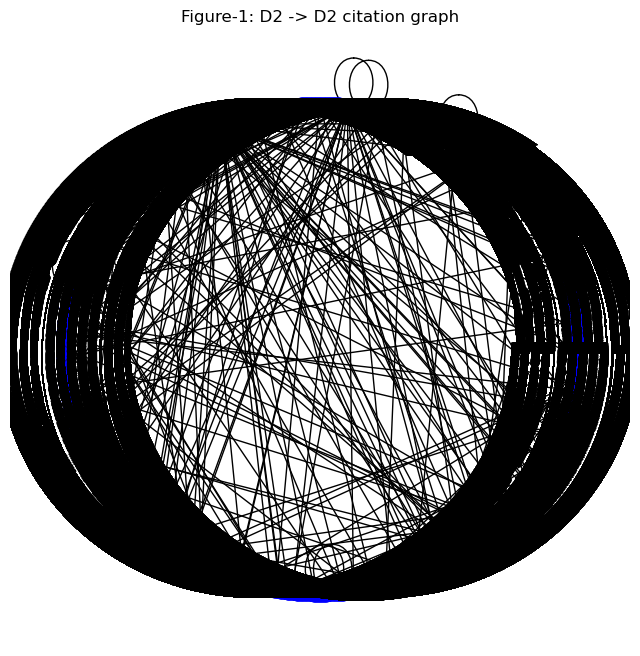

In [45]:
# draw graph
plt.figure(figsize = (8, 8))
plt.axis('off')
layout = nx.draw_circular(citation_graph, with_labels = True, node_color = 'b', node_size = 100, alpha = 1)
#nx.draw_networkx_nodes(citation_graph, pos = layout, node_size = 500, alpha = 0.8)
#nx.draw_networkx_edges(citation_graph, pos = layout, width = 3, style = 'dotted')
#nx.draw_networkx_labels(citation_graph, pos = layout, font_size = 15)
plt.title("Figure-1: D2 -> D2 citation graph")
plt.show()

In [163]:
def save_graph(obj):
    try:
        with open("Part3_citation_graph.pickle", "wb") as f:
            pickle.dump(obj, f, protocol=pickle.HIGHEST_PROTOCOL)
    except Exception as ex:
        print("Error during pickling object (Possibly unsupported):", ex)

In [164]:
citation_graph = MyClass(citation_graph)
save_graph(citation_graph)